<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da06_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

그래프 시각화나 통계적인 방법으로 자료를 분석하는 과정.

# 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# iris 데이터셋

*   seaborn 모듈의 iris 데이터셋을 로드 -> DataFrame
*   iris 데이터프레임 확인 - 요약, 기술통계량, 카테고리 타입 빈도수
*   숫자 타입 변수들의 box plot
*   숫자 타입 변수들의 평균 막대 그래프
*   품종별 모든 연속형 변수들의 box plot
*   품종별 모든 연속형 변수들의 평균 막대 그래프
*   petal_length ~ petal_width 산점도, 품종별로 색깔을 다르게 시각화.
*   모든 연속형 변수들 간의 상관관계(산점도). 힌트: `pairplot()`


In [2]:
iris = sns.load_dataset(name='iris')

In [3]:
iris.head()  # tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.sepal_length.describe()

,sepal_length
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


In [7]:
iris.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


## 숫자 타입 변수들의 box plot

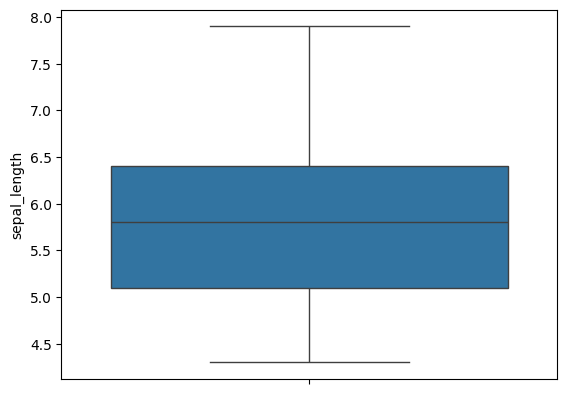

In [10]:
sns.boxplot(data=iris, y='sepal_length')
plt.show()

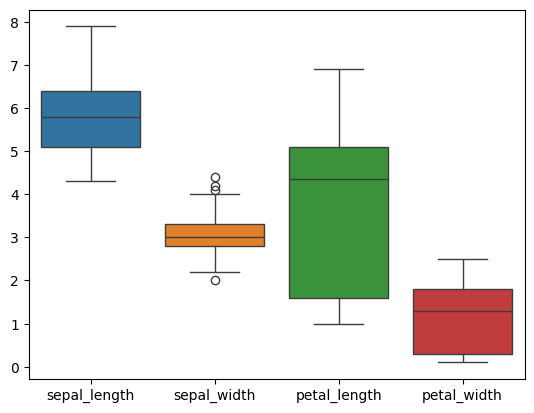

In [11]:
sns.boxplot(data=iris)
plt.show()

## 숫자 타입 변수들의 평균 막대 그래프

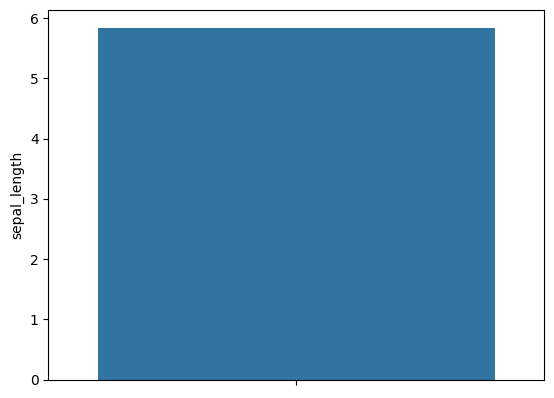

In [12]:
sns.barplot(data=iris, y='sepal_length', errorbar=None)  #> estimator='mean' 기본값
plt.show()

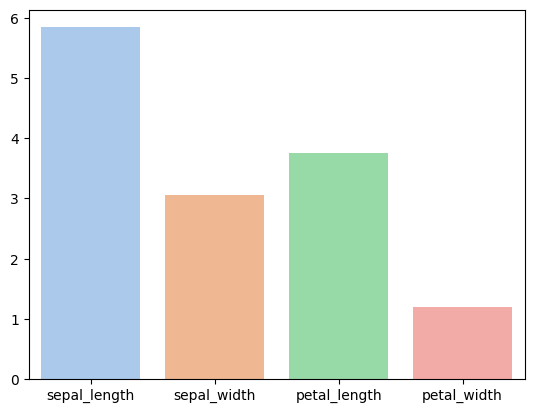

In [14]:
sns.barplot(data=iris, errorbar=None, palette='pastel')
plt.show()

In [18]:
iris.sepal_length.mean()

np.float64(5.843333333333334)

In [20]:
iris[['sepal_length', 'sepal_width']].mean()

,0
sepal_length,5.843333
sepal_width,3.057333


In [23]:
print(iris.columns)
print(iris.columns[0])  # 배열 indexing
print(iris.columns[:4])  # 배열 slicing

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [25]:
iris[iris.columns[:4]].mean()

,0
sepal_length,5.843333
sepal_width,3.057333
petal_length,3.758000
petal_width,1.199333


## 품종별 box plot

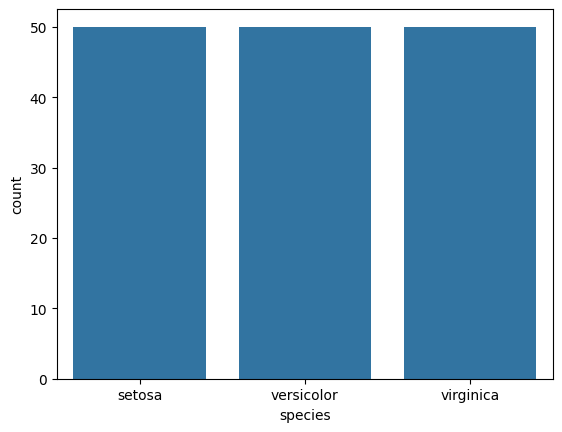

In [26]:
sns.countplot(data=iris, x='species')
plt.show()

In [31]:
iris[iris.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


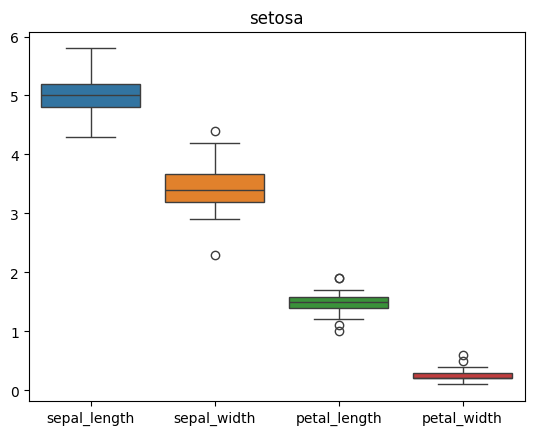

In [34]:
setosa = iris[iris.species == 'setosa']
sns.boxplot(data=setosa)
plt.title('setosa')
plt.show()

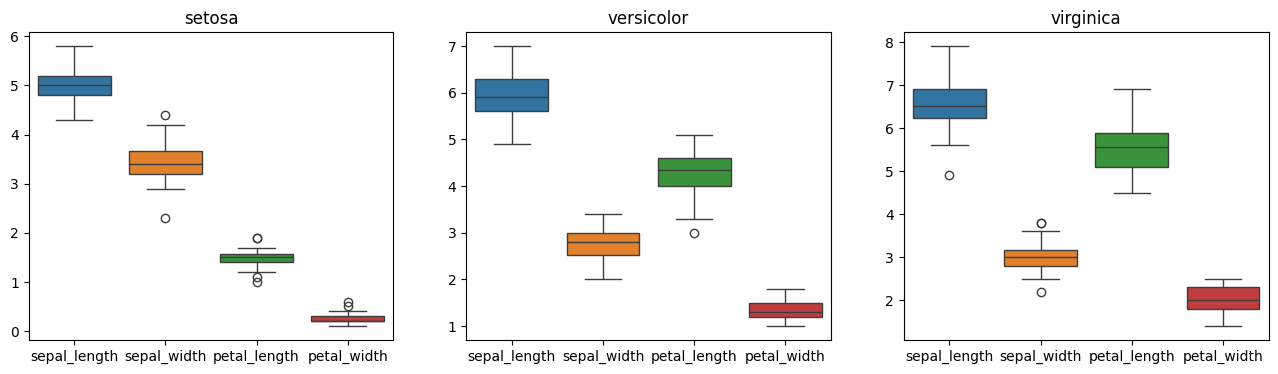

In [41]:
species = iris.species.unique()
# print(species)
# print(len(species))

fig, axes = plt.subplots(ncols=len(species), figsize=(16, 4))

for i, s in enumerate(species):
    # print(i, s)
    subset_df = iris[iris.species == s]
    sns.boxplot(data=subset_df, ax=axes[i])
    axes[i].set_title(s)

plt.show()

## 품종별 막대 그래프

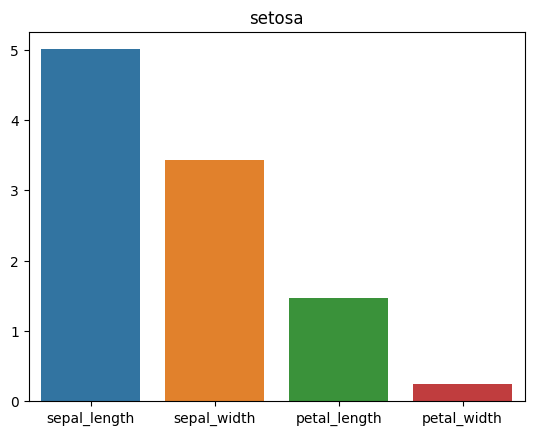

In [44]:
setosa = iris[iris.species == 'setosa']
sns.barplot(data=setosa, errorbar=None)
plt.title('setosa')
plt.show()

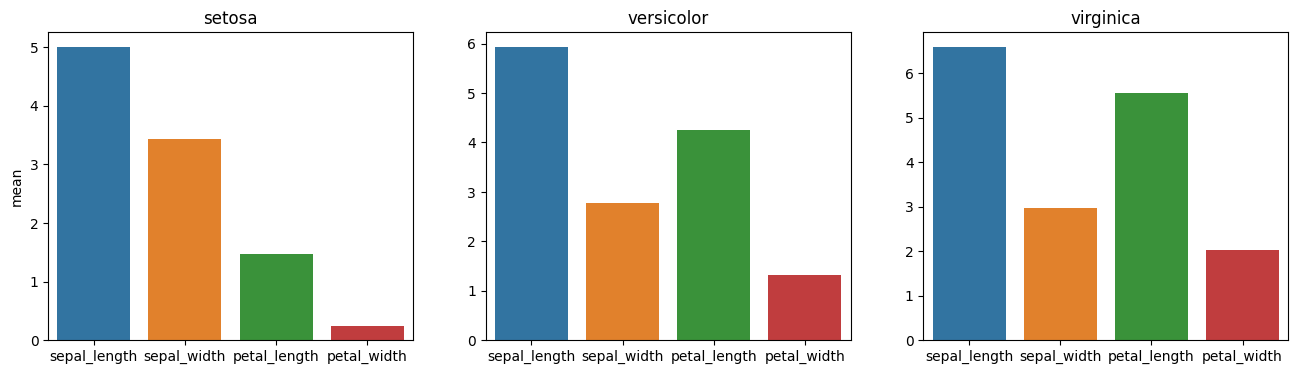

In [49]:
fig, axes = plt.subplots(ncols=len(species), figsize=(16, 4))

for i, s in enumerate(species):
    subset_df = iris[iris.species == s]
    sns.barplot(data=subset_df, ax=axes[i], errorbar=None)
    axes[i].set_title(s)

axes[0].set_ylabel('mean')

plt.show()

In [51]:
iris.groupby(by=['species']).sepal_width.mean()

,sepal_width
species,
setosa,3.428
versicolor,2.770
virginica,2.974


In [53]:
iris.groupby(by=['species'])[iris.columns[:4]].mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
